In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


---
# Standard matrix multiplication, parts 1 & 2
---


In [2]:
## rules for multiplication validity

m = 4
n = 3
k = 6

# make some matrices
A = np.random.randn(m,n)
B = np.random.randn(n,k)
C = np.random.randn(m,k)

# test which multiplications are valid.
# Think of your answer first, then test.
#np.matmul(A,B)
#np.matmul(A,A)
print(np.matmul(A.T,C))
print(np.matmul(B,B.T))
print(np.matmul(np.matrix.transpose(B),B))
#np.matmul(B,C)
#np.matmul(C,B)
#np.matmul(C.T,B)
print(np.matmul(C,B.T))

[[-1.7177168   0.66503955  0.1511743  -0.63089041 -3.28900982  0.05422223]
 [ 0.12254606  0.03709724 -0.54489316  0.27767784  0.88407735  0.06030572]
 [-0.3529506   2.06566963  1.17314034 -2.28952316  0.21425464  3.95361572]]
[[ 8.16887809 -3.93806111  0.40003174]
 [-3.93806111  2.95764725  0.43458315]
 [ 0.40003174  0.43458315  3.77408343]]
[[ 3.61691424 -2.09419037 -0.76320737 -0.52082142  2.89544813 -3.03463699]
 [-2.09419037  1.44568962  0.46582055  0.05264309 -2.21156679  1.605045  ]
 [-0.76320737  0.46582055  1.14309607 -1.06036169 -0.9445111  -0.2301458 ]
 [-0.52082142  0.05264309 -1.06036169  1.67840667  0.47993543  1.59824724]
 [ 2.89544813 -2.21156679 -0.9445111   0.47993543  3.62524337 -1.8372899 ]
 [-3.03463699  1.605045   -0.2301458   1.59824724 -1.8372899   3.39125881]]
[[-4.12887857  3.32301889  0.09268028]
 [ 0.95555213  0.3412099   1.58488123]
 [-3.61924769  1.47316438  0.65522774]
 [-0.97180534  0.71071546  2.59452875]]



---
# Order-of-operations on matrices
---


In [4]:

n = 7
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

# result of "forward" multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )
res3 = L @ I @ V @ E 
res3 = res3.T
# result of "flipped" multiplication of transposed matrices
res2 = E.T @ V.T @ I.T @ L.T

# test equality by subtracting (ignore possible computer rounding errors)
print(np.array(res1-res2, dtype = np.uint8) )
print(np.array(res1-res3, dtype = np.uint8) )

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [5]:
a = np.array([
                [2,3,3],
                [3,4,5]
            ])
b = np.array([
                [2,3],
                [3,4],
                [1,33]
            ])

In [6]:
np.matmul(a,b)

array([[ 16, 117],
       [ 23, 190]])

In [16]:
a@b

array([[ 16, 117],
       [ 23, 190]])


---
# Matrix-vector multiplication
---


In [7]:

# number of elements
m = 4

# create matrices
N = np.random.randint(-10,11,(m,m))
S = np.round( N.T*N / m**2 ) # scaled symmetric

# and vector
w = np.array([-1, 0, 1, 2])

# with symmetric matrix
print( S@w )     # 1
print( S.T@w )   # 2
print( w@S )     # 3
print( w.T@S.T ) # 4
print( w.T@S )   # 5

print("---------------------------------")

# with nonsymmetric matrix
print( N@w )     # 1
print( N.T@w )   # 2
print( w@N )     # 3
print( w.T@N.T ) # 4
print( w.T@N )   # 5


[-5. -8.  3.  7.]
[-5. -8.  3.  7.]
[-5. -8.  3.  7.]
[-5. -8.  3.  7.]
[-5. -8.  3.  7.]
---------------------------------
[ 16 -21  -6 -13]
[ -5  -1 -17 -18]
[ -5  -1 -17 -18]
[ 16 -21  -6 -13]
[ -5  -1 -17 -18]



---
# transformation matrices
---


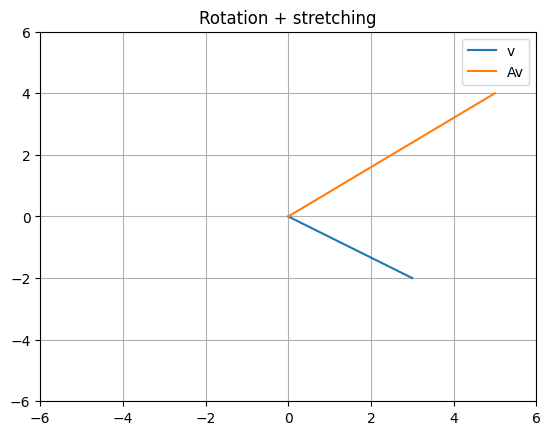

In [8]:
# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 transformation matrix
A = np.array([ [1,-1], [2,1] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.title('Rotation + stretching')
plt.show()

In [9]:
5*np.pi/24

0.6544984694978736

3.6055512754639896
3.605551275463989


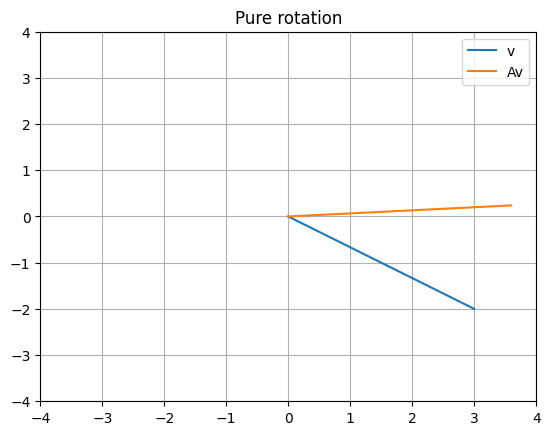

In [10]:
## pure rotation

# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 rotation matrix
th = 5*np.pi/24
A = np.array([ [math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)

print(np.linalg.norm(w))
print(np.linalg.norm(v))

print("===================================")
# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.title('Pure rotation')
plt.show()


---
#  Additive and multiplicative matrix identities
---


In [11]:
# size of matrices
n = 4

# create the matrices
A = np.round( 10*np.random.randn(n,n) )
I = np.eye(n)
Z = np.zeros((n,n))

# test both identities
print(np.array_equal( A@I , A   ))
print(np.array_equal( A   , A@I ))
print(np.array_equal( A   , A+I ))

print(np.array_equal( A   , A+I ))
print(np.array_equal( A+Z , A@I ))


True
True
False
False
True



---
# Additive and multiplicative symmetric matrices
---


In [12]:
## the additive method

# specify sizes
m = 5
n = 5

# create matrices
A = np.random.randn(m,n)
S = ( A + A.T )/2

# A symmetric matrix minus its transpose should be all zeros
print( S-S.T )


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [14]:
## the multiplicative method

# specify sizes
m = 5
n = 3

# create matrices
A   = np.random.randn(m,n)
AtA = A.T@A
AAt = A@A.T

# first, show that they are square
print( AtA.shape )
print( AAt.shape )


# next, show that they are symmetric
print( AtA - AtA.T )
print( AAt - AAt.T )



(3, 3)
(5, 5)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]



---
#  Element-wise (Hadamard) multiplication
---


In [16]:
# any matrix sizes
m = 4
n =  2

# ...but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# note the different syntax compared to @ for matrix multiplication
C1 = np.multiply( A,B )
C2 = A*B

print(C1), print(' ')
print(C2), print(' ')

print(C1-C2)


[[-0.62294356  1.11784161]
 [-1.53437426 -0.01106655]
 [-3.30365489 -0.44821759]
 [-0.04604872  0.06469254]]
 
[[-0.62294356  1.11784161]
 [-1.53437426 -0.01106655]
 [-3.30365489 -0.44821759]
 [-0.04604872  0.06469254]]
 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]



---
#  Multiplication of two symmetric matrices
---


In [19]:
# using the sympy library
from sympy import *

a,b,c,d,e,f,g,h,k,l,m,n,o,p,q,r,s,t,u = symbols('a b c d e f g h k l m n o p q r s t u', real=True)

# symmetric and constant-diagonal matrices
A = Matrix([ [a,b,c,d],
             [b,a,e,f],
             [c,e,a,h],
             [d,f,h,a]])

B = Matrix([ [l,m,n,o],
             [m,l,q,r],
             [n,q,l,t],
             [o,r,t,l]])


# confirmation that A and B are symmetric
print( A - A.transpose() )
print( B - B.transpose() )

print("---------------------------------")
# ... and constant diagonal
for i in range(0,np.size(A,0)):
    print( A[i,i] )
for i in range(0,np.size(B,0)):
    print( B[i,i] )


Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
---------------------------------
a
a
a
a
l
l
l
l


In [20]:
# nice printing in sympy
init_printing()

# but AB neq (AB)'
print(A@B - (A@B).T)

# maybe for a submatrix?
n = 3
A1 = A[ 0:n,0:n ]
B1 = B[ 0:n,0:n ]

A1@B1 - (A1@B1).T

Matrix([[0, c*q + d*r - e*n - f*o, b*q + d*t - e*m - h*o, b*r + c*t - f*m - h*n], [-c*q - d*r + e*n + f*o, 0, b*n - c*m + f*t - h*r, b*o - d*m + e*t - h*q], [-b*q - d*t + e*m + h*o, -b*n + c*m - f*t + h*r, 0, c*o - d*n + e*r - f*q], [-b*r - c*t + f*m + h*n, -b*o + d*m - e*t + h*q, -c*o + d*n - e*r + f*q, 0]])


⎡    0       c⋅q - e⋅n   b⋅q - e⋅m⎤
⎢                                 ⎥
⎢-c⋅q + e⋅n      0       b⋅n - c⋅m⎥
⎢                                 ⎥
⎣-b⋅q + e⋅m  -b⋅n + c⋅m      0    ⎦


---
#  Frobenius dot-product
---


In [33]:
# any matrix sizes
m = 9
n = 4

# but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# first vectorize, then vector-dot-product
Av = np.reshape( A,m*n, order='F' ) # order='F' reshapes by columns instead of by rows
Bv = np.reshape( B,m*n, order='F' )
frob_dp = np.dot( Av,Bv )

# trace method
frob_dp2 = np.trace( A.T@B )
print(frob_dp2)
print(frob_dp)

# matrix norm
Anorm  = np.linalg.norm(A,'fro')
Anorm2 = np.sqrt( np.trace( A.T@A ) )
# print(Anorm)
# print(Anorm2)

0.4120485638420308
0.4120485638420306


#  Matrix norms

In [34]:
# Create a matrix
A = np.array([ [1,2,3], [4,5,6], [7,7,9] ])

# optional orthogonal matrix to show that 2-norm is 1
Q,R = np.linalg.qr(np.random.randn(5,5))
# A = Q

# Frobenius norm
normFrob = np.linalg.norm(A,'fro')

# induced 2-norm
normInd2 = np.linalg.norm(A,2)
# note: computed as below
lamb = np.sqrt( np.max(np.linalg.eig(A.T@A)[0]) )

# schatten p-norm
p = 2
s = np.linalg.svd(A)[1] # get singular values
normSchat = np.sum(s**p)**(1/p)


# % show all norms for comparison
print(normFrob,normSchat,normInd2)


16.431676725154983 16.431676725154986 16.392007827749776
